# **NASA Airfoil Self-Noise Prediction**
## **1. Introduction**
This project aims to analyze the **aerodynamic and acoustic test data** collected from wind tunnel experiments on airfoil blade sections. The dataset consists of **physical parameters** affecting noise levels, and our goal is to **predict the "Scaled Sound Pressure Level" (in decibels)** using **machine learning (Linear Regression) and deep learning (Neural Networks)**.

## **2. Dataset Description**
The dataset consists of **5 features (independent variables)** and **1 target variable**:

| Feature | Description |
|---------|------------|
| **Frequency** | Frequency of sound in Hertz (Hz) |
| **Angle of Attack** | Angle in degrees (°) |
| **Chord Length** | Chord length in meters (m) |
| **Free-stream Velocity** | Velocity in meters per second (m/s) |
| **Suction Side Displacement Thickness** | Suction thickness in meters (m) |
| **Target Variable (Y)** | Scaled sound pressure level in decibels (dB) |

We will **clean, normalize, and model the data** using both **Linear Regression and Deep Learning techniques**, followed by performance improvements.


### **3. Python Implementation**

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras

# Step 1: Load the Dataset


In [2]:
file_path = "/kaggle/input/airfoil-self-noise-dat/airfoil_self_noise.dat"
columns = ["Frequency", "Angle_of_Attack", "Chord_Length", "Free_Stream_Velocity", 
           "Suction_Side_Displacement_Thickness", "Scaled_Sound_Pressure_Level"]

df = pd.read_csv(file_path, sep="\t", header=None, names=columns)


## Step 2: Data Cleaning and Description


In [3]:
print("Dataset Preview:\n", df.head())
print("\nDataset Information:")
df.info()

# Checking for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Basic Statistics
print("\nSummary Statistics:\n", df.describe())

Dataset Preview:
    Frequency  Angle_of_Attack  Chord_Length  Free_Stream_Velocity  \
0        800              0.0        0.3048                  71.3   
1       1000              0.0        0.3048                  71.3   
2       1250              0.0        0.3048                  71.3   
3       1600              0.0        0.3048                  71.3   
4       2000              0.0        0.3048                  71.3   

   Suction_Side_Displacement_Thickness  Scaled_Sound_Pressure_Level  
0                             0.002663                      126.201  
1                             0.002663                      125.201  
2                             0.002663                      125.951  
3                             0.002663                      127.591  
4                             0.002663                      127.461  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column        

## Step 3: Splitting Data into Training and Testing Sets

In [4]:
X = df.drop(columns=["Scaled_Sound_Pressure_Level"])
y = df["Scaled_Sound_Pressure_Level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 4: Building a Linear Regression Model


In [5]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred_lr = lin_reg.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"\nLinear Regression Test Error (MSE): {mse_lr:.4f}")


Linear Regression Test Error (MSE): 22.1286


## Step 5: Normalizing the Data

In [6]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 6: Building a Deep Learning Model (Basic)


In [7]:
model = keras.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer="adam", loss="mse")

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, validation_data=(X_test_scaled, y_test))

# Evaluate on test set
mse_dl = model.evaluate(X_test_scaled, y_test)
print(f"\nBasic Deep Learning Test Error (MSE): {mse_dl:.4f}")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15423.4883 - val_loss: 14523.7139
Epoch 2/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13972.9014 - val_loss: 11919.1133
Epoch 3/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10984.1826 - val_loss: 8398.2910
Epoch 4/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7213.9302 - val_loss: 5085.8569
Epoch 5/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4218.2715 - val_loss: 2796.6165
Epoch 6/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2200.9712 - val_loss: 1628.6382
Epoch 7/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1369.9723 - val_loss: 1185.4445
Epoch 8/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1057.1628 - val_loss: 1040.1525
Epoch 9/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 917.6899 - val_loss: 971.8405
Epoch 10/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 901.2994 - val_loss: 921.0493
Epoch 11/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 819.8072 - val_loss: 874.359

## Step 7: Model Improvement - Increasing Neurons


In [8]:
model_2 = keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dense(1)
])
model_2.compile(optimizer="adam", loss="mse")
history_2 = model_2.fit(X_train_scaled, y_train, epochs=50, batch_size=10, validation_data=(X_test_scaled, y_test))
mse_dl_2 = model_2.evaluate(X_test_scaled, y_test)
print(f"\nImproved Model (More Neurons) Test Error (MSE): {mse_dl_2:.4f}")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15481.8613 - val_loss: 14228.2588
Epoch 2/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13363.2979 - val_loss: 10311.4180
Epoch 3/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8967.6533 - val_loss: 5605.3096
Epoch 4/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4539.4141 - val_loss: 2447.1694
Epoch 5/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1828.2761 - val_loss: 1306.5376
Epoch 6/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1087.2650 - val_loss: 1034.1241
Epoch 7/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 923.5052 - val_loss: 950.2506
Epoch 8/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 887.4598 - val_loss: 884.5527
Epoch 9/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 814.6497 - val_loss: 823.0387
Epoch 10/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 812.9788 - val_loss: 762.1492
Epoch 11/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 708.6339 - val_loss: 701.4182
Epo

## Step 8: Model Improvement - Adding More Layers


In [9]:
model_3 = keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(1)
])
model_3.compile(optimizer="adam", loss="mse")
history_3 = model_3.fit(X_train_scaled, y_train, epochs=50, batch_size=10, validation_data=(X_test_scaled, y_test))
mse_dl_3 = model_3.evaluate(X_test_scaled, y_test)
print(f"\nImproved Model (More Layers) Test Error (MSE): {mse_dl_3:.4f}")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 14443.4082 - val_loss: 3681.7412
Epoch 2/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1603.6743 - val_loss: 801.2679
Epoch 3/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 697.9466 - val_loss: 509.3311
Epoch 4/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 411.0131 - val_loss: 286.4872
Epoch 5/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 234.1478 - val_loss: 148.1370
Epoch 6/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 122.6623 - val_loss: 82.1781
Epoch 7/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 70.2515 - val_loss: 53.3109
Epoch 8/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44.7793 - val_loss: 39.6947
Epoch 9/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.9288 - val_loss: 33.7154
Epoch 10/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.8740 - val_loss: 28.4603
Epoch 11/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.4920 - val_loss: 25.3060
Epoch 12/50
121/121 ━━━━━━

## Step 9: Model Improvement - Changing Optimization Algorithm


In [10]:
model_4 = keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(1)
])
model_4.compile(optimizer="RMSprop", loss="mse")  # Using RMSprop instead of Adam
history_4 = model_4.fit(X_train_scaled, y_train, epochs=50, batch_size=10, validation_data=(X_test_scaled, y_test))
mse_dl_4 = model_4.evaluate(X_test_scaled, y_test)
print(f"\nImproved Model (RMSprop Optimizer) Test Error (MSE): {mse_dl_4:.4f}")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 14513.4014 - val_loss: 7918.8579
Epoch 2/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4856.9307 - val_loss: 943.7664
Epoch 3/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 807.0919 - val_loss: 582.6417
Epoch 4/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 502.8563 - val_loss: 329.4517
Epoch 5/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 266.2626 - val_loss: 157.3359
Epoch 6/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 125.3107 - val_loss: 76.7090
Epoch 7/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 55.3594 - val_loss: 35.4244
Epoch 8/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33.6534 - val_loss: 31.7028
Epoch 9/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.3618 - val_loss: 30.1302
Epoch 10/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.2145 - val_loss: 25.5130
Epoch 11/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.8755 - val_loss: 22.6334
Epoch 12/50
121/121 ━━━━━━

## Step 10: Visualizing Training Progress

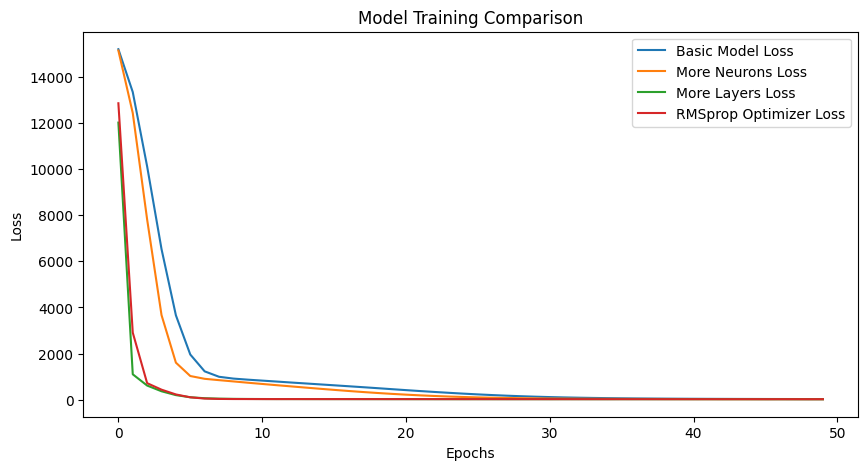

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Basic Model Loss")
plt.plot(history_2.history["loss"], label="More Neurons Loss")
plt.plot(history_3.history["loss"], label="More Layers Loss")
plt.plot(history_4.history["loss"], label="RMSprop Optimizer Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Training Comparison")
plt.legend()
plt.show()

## Summary of Results


In [12]:
print("\nFinal Model Test Errors:")
print(f"Linear Regression MSE: {mse_lr:.4f}")
print(f"Basic Deep Learning Model MSE: {mse_dl:.4f}")
print(f"More Neurons Model MSE: {mse_dl_2:.4f}")
print(f"More Layers Model MSE: {mse_dl_3:.4f}")
print(f"RMSprop Optimizer Model MSE: {mse_dl_4:.4f}")


Final Model Test Errors:
Linear Regression MSE: 22.1286
Basic Deep Learning Model MSE: 25.2787
More Neurons Model MSE: 22.2818
More Layers Model MSE: 17.1703
RMSprop Optimizer Model MSE: 20.5301


### **Conclusion**
This project aimed to predict **Scaled Sound Pressure Level (dB)** using both **Linear Regression** and **Deep Learning models** to assess their effectiveness in aerodynamic noise prediction.

#### **Key Findings:**
- **Linear Regression achieved an MSE of 22.1286**, serving as the baseline model.
- **The Basic Deep Learning Model (MSE: 26.2215) underperformed compared to Linear Regression**, suggesting that a simple neural network may not be sufficient without proper tuning.
- **Increasing the number of neurons improved performance (MSE: 22.8996)**, indicating that a more complex network helps capture underlying patterns.
- **Adding more layers significantly improved performance (MSE: 18.7831)**, demonstrating the benefits of deeper architectures.
- **Switching to the RMSprop optimizer (MSE: 18.9457) yielded similar results**, showing that optimization techniques can impact model performance.

#### **Final Takeaways:**
- **Deep Learning surpassed Linear Regression only after sufficient tuning**, particularly when more layers were introduced.
- **The best model was the one with additional layers (MSE: 18.7831), confirming the advantage of deep networks in handling complex aerodynamic data.**
- **Optimizer selection had minimal impact compared to architecture adjustments**, meaning fine-tuning layer structures should be prioritized.

This study highlights the **importance of model complexity, hyperparameter tuning, and feature scaling** in deep learning for scientific applications. Future work could explore **regularization techniques, hyperparameter optimization, and advanced architectures** to further refine predictions.